<a href="https://colab.research.google.com/github/nicolassalomon96/aprendizaje_maquina_UNS/blob/master/TP2/Ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP2 - Ejercicio 1

Presentado: Nicolás Salomón - email: nicolassalomon96@gmail.com

En https://github.com/manlio99/Materia-de-aprendizaje/blob/master/4_DataWrangling/data/casos_covid_bahia.csv
y https://github.com/manlio99/Materia-de-aprendizaje/blob/master/4_DataWrangling/data/camas_covid_bahia.csv
están datasets de la situación epidemiológica y sanitaria relacionada con el covid en Bahía Blanca en los últimos meses (fuente https://datos.bahia.gob.ar/dataset?groups=covid19).
Las variables son discretas (personas) pero se puede aplicar razonablemente el análisis estadístico como si fuesen valores continuos.
Hay variables que puedan ser razonablemente consideradas normales? Hay variables que tienen un comportamiento sospechoso?

## 1. Se importan librerias necesarias y se clonan los datasets del repositorio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
covid_cases_url = 'https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv'
covid_cases = pd.read_csv(covid_cases_url)
 
covid_beds_url = 'https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/camas_covid_bahia.csv'
covid_beds = pd.read_csv(covid_beds_url)

## 2. Inspección del dataset de casos de covid en Bahía Blanca



### 2.1. Muestra de datos

In [5]:
print("Datos de Covid en Bahía Blanca\n")
display(covid_cases)

Datos de Covid en Bahía Blanca



,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
0,2020-06-30,106,29,71,6,574,23,342,2338,181,0
1,2020-07-01,114,31,77,6,581,22,342,2207,172,0
2,2020-07-02,124,40,78,6,588,24,356,2162,176,0
3,2020-07-03,137,53,78,6,606,31,356,2353,190,0
4,2020-07-04,154,70,78,6,622,31,356,2377,214,0
...,...,...,...,...,...,...,...,...,...,...,...
83,2020-09-21,2589,1319,1209,61,3557,303,417,1261,510,0
84,2020-09-22,2714,1371,1282,61,3615,292,417,1197,554,0
85,2020-09-23,2841,1464,1313,64,3658,286,417,1206,562,0
86,2020-09-24,2906,1474,1366,66,3682,331,417,1221,562,0


### 2.2. Datos estadísticos de casos de covid en Bahía Blanca

In [6]:
#Se muestran valores estadísticos del dataset
print("\nValores estadísticos del dataset")
display(covid_cases.describe())

print(f"\nTotal de casos de covid: {covid_cases['confirmados'].sum()}")

print(f"\nTotal de recuperados de covid: {covid_cases['recuperados'].sum()}")

print(f"\nTotal de decesos por covid: {covid_cases['decesos'].sum()}")



Valores estadísticos del dataset


,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.0
mean,944.977273,403.738636,516.238636,25.000000,2007.647727,157.613636,407.295455,1360.386364,287.920455,0.0
std,741.951512,377.382561,369.502430,16.613248,951.537510,101.144080,21.174241,289.810181,113.161691,0.0
min,106.000000,29.000000,71.000000,6.000000,574.000000,22.000000,342.000000,1014.000000,169.000000,0.0
25%,422.000000,201.250000,164.000000,13.000000,1159.250000,96.000000,417.000000,1215.000000,206.250000,0.0
50%,706.500000,238.000000,502.000000,20.000000,1999.500000,122.000000,417.000000,1280.000000,246.500000,0.0
75%,1262.750000,487.750000,742.250000,32.750000,2794.500000,232.250000,417.000000,1374.750000,370.500000,0.0
max,3012.000000,1512.000000,1434.000000,66.000000,3738.000000,382.000000,417.000000,2377.000000,625.000000,0.0



Total de casos de covid: 83158

Total de recuperados de covid: 45429

Total de decesos por covid: 2200


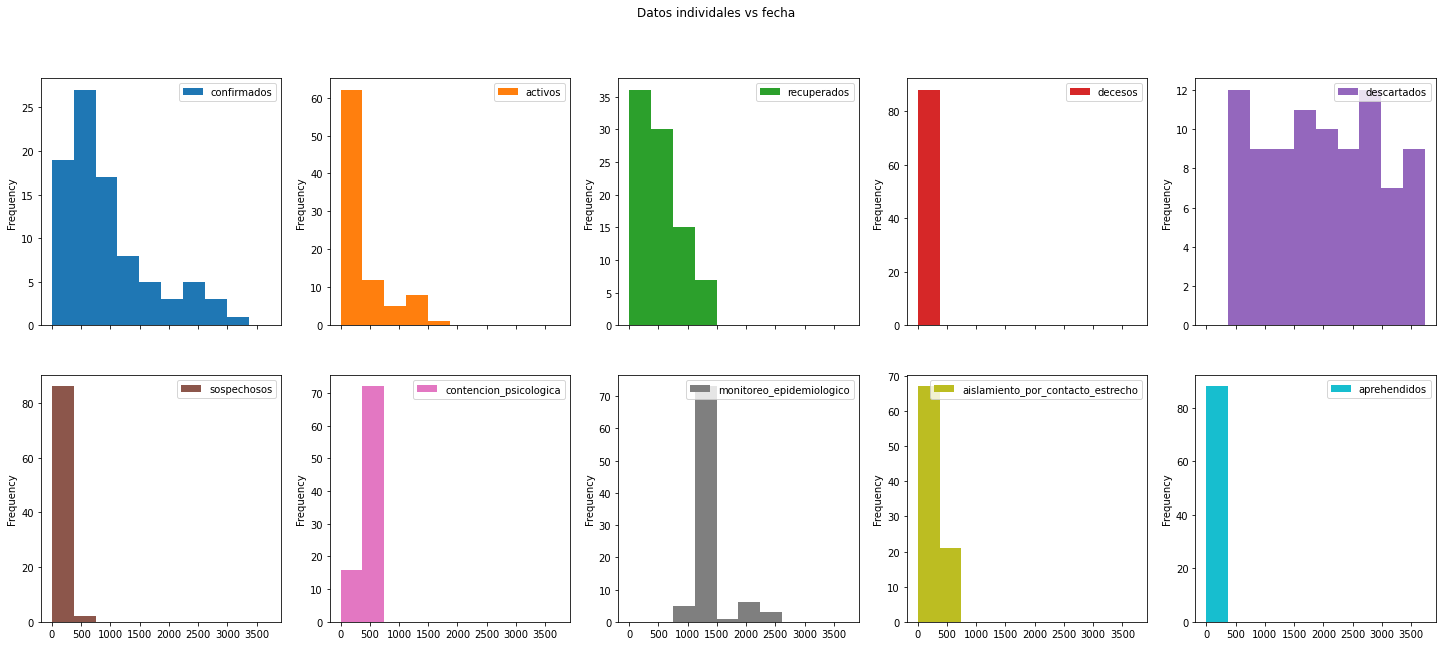

In [7]:
covid_cases.plot(kind = 'hist',
                 x = 'fecha',
                 subplots = True,
                 layout = (2, 5),
                 figsize=(25,10),
                 xticks=range(0,4000,500),
                 title='Datos individales vs fecha')
plt.show()

* Es posible observar como el máximo de casos confirmados estuvieron en torno a los 3000 a 3200, pero sin embargo esto se dió con una frecuencia muy baja, en general la cantidad de casos confirmados se encuentran hasta los 1000 a 1200.

* Vemos que los picos de ciertos datos importantes (confirmados, activos, en aislamiento por contacto estrecho) no tuvieron una duración muy importante, dado que la frecuencia de los valores mas elevados en dichas variables es pequeña.

### 2.3. Gráfica de datos en función de la fecha

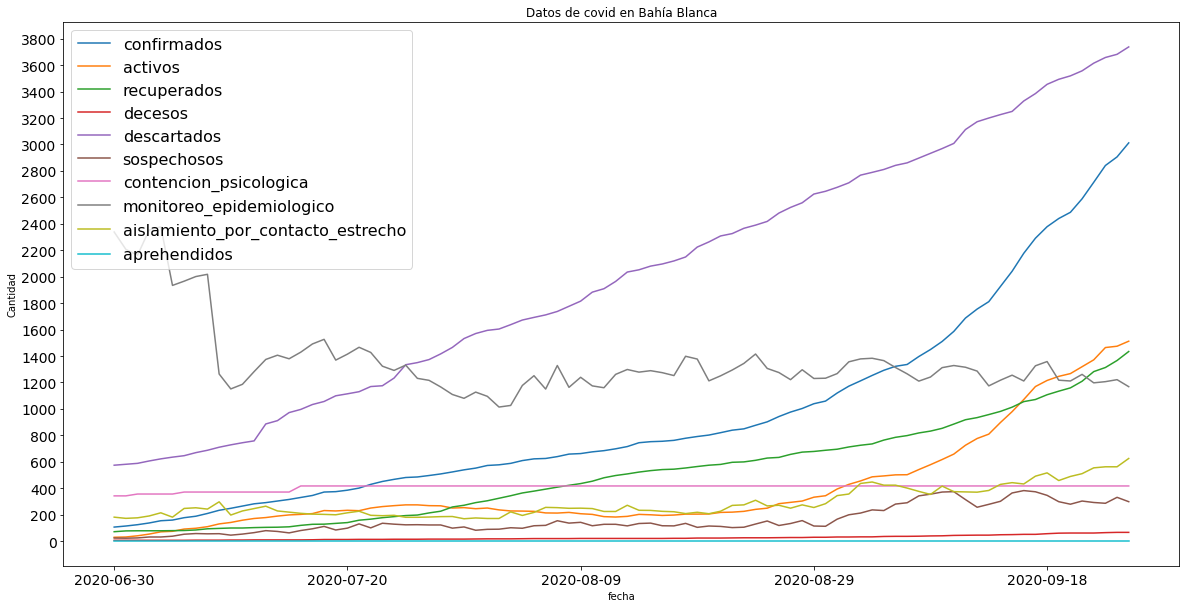

In [9]:
covid_cases.plot(kind='line', x='fecha', yticks=range(0,4000,200), ylabel='Cantidad', figsize=(20,10), title='Datos de covid en Bahía Blanca', fontsize=14).legend(loc=2, prop={'size': 16})
plt.show()

### 2.4. Muesta de datos individuales

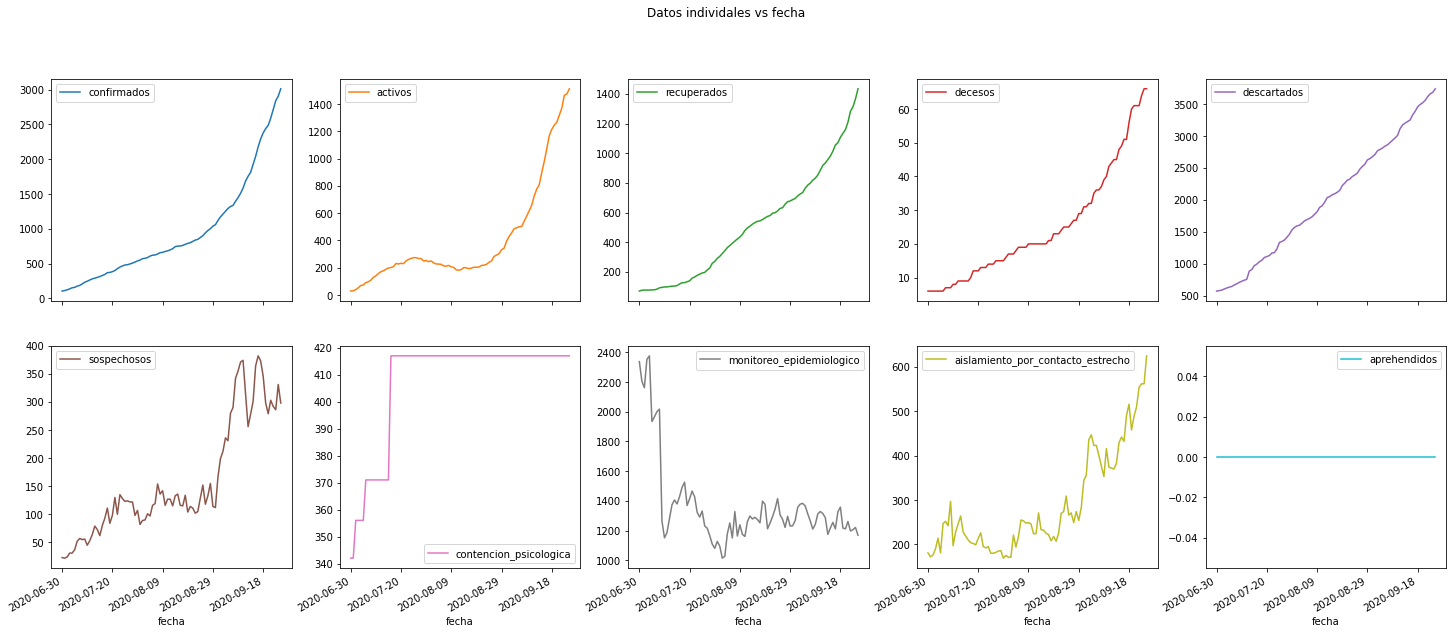

In [10]:
covid_cases.plot(kind = 'line',
                 x = 'fecha',
                 subplots = True,
                 layout = (2, 5),
                 figsize=(25,10),
                 title='Datos individales vs fecha')
plt.show()

Conclusiones:

* Es posibe apreciar como con el avance de los días, las principales variables se encuentran en aumento (casos confirmados, activos, decesos, entre otros) lo que podría indicar algún error en la gestión sanitaria de la pandemia.

* Sin embargo, aunque los casos activos aumentan, el monitoreo epidemiológico disminuye, reforzando aún más la hipótesis anterior.

* Existe una situación atípica en los casos de contención psicológica, pareciera suceder que existen períodos en que dichos casos permanecen estables, y luego de un tiempo vuelven a aumentar hasta quedar finalmente sin cambios en 417 casos. Esto podría deberse a un error en la carga de datos, o a una suspensión de la carga de los mismos.



## 3. Inspección del dataset de camas ocupadas en Bahía Blanca

### 3.1. Muestra de datos

In [21]:
#Dado que los datos estan dados desde los mas nuevos a los datos mas antiguos, se invierten para poder verse de forma mas clara
covid_beds = covid_beds.iloc[::-1]
covid_beds = covid_beds.reset_index().drop('index', axis=1)

print("Camas ocupadas por pacientes Covid en Bahía Blanca\n")
display(covid_beds)

Camas ocupadas por pacientes Covid en Bahía Blanca



,informeNumero,fecha,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma,observaciones
0,1,2020-06-30,848,347,40,155,15,10,16,32,1,143,23,0,0,137,0,3,NaN
1,7,2020-07-01,848,386,45,155,12,12,15,32,2,143,24,0,0,137,0,3,NaN
2,8,2020-07-02,848,358,42,155,14,14,18,32,4,143,25,0,0,137,0,3,NaN
3,9,2020-07-03,848,349,41,155,18,13,20,32,4,143,25,0,0,137,0,3,NaN
4,10,2020-07-04,848,343,40,155,14,14,18,32,3,143,22,0,0,137,0,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,127,2020-09-21,848,368,43,163,32,82,69,32,24,142,40,72,24,147,10,4,NaN
84,128,2020-09-22,848,391,46,163,30,83,69,32,21,142,43,72,24,147,15,4,NaN
85,129,2020-09-23,848,402,47,163,21,85,65,32,22,142,42,71,23,147,19,4,NaN
86,130,2020-09-24,848,391,46,163,25,86,68,32,17,142,39,69,21,147,21,4,NaN


### 3.2. Datos estadísticos

In [22]:
print("\nValores estadísticos del dataset")
display(covid_beds.describe())


Valores estadísticos del dataset


,informeNumero,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,70.670455,817.500000,350.159091,40.920455,162.068182,19.647727,34.909091,32.795455,31.636364,8.170455,137.181818,24.284091,39.943182,8.386364,144.159091,5.170455,3.715909
std,42.113072,155.002113,77.216502,9.006028,18.349603,6.586367,21.706843,15.509107,1.598719,7.014307,26.004220,8.541917,27.322408,7.529912,4.535648,4.334363,0.453565
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,137.000000,0.000000,3.000000
25%,30.750000,848.000000,325.750000,38.000000,163.000000,15.750000,20.000000,22.000000,32.000000,3.000000,142.000000,20.000000,0.000000,0.000000,137.000000,3.000000,3.000000
50%,87.500000,848.000000,367.500000,43.000000,163.000000,18.000000,25.000000,26.500000,32.000000,4.500000,142.000000,25.000000,54.000000,7.500000,147.000000,4.000000,4.000000
75%,109.250000,848.000000,391.000000,46.000000,163.000000,23.000000,52.250000,44.250000,32.000000,13.250000,142.000000,28.000000,62.000000,14.000000,147.000000,6.000000,4.000000
max,131.000000,851.000000,450.000000,53.000000,177.000000,42.000000,86.000000,77.000000,33.000000,24.000000,143.000000,43.000000,72.000000,25.000000,147.000000,21.000000,4.000000


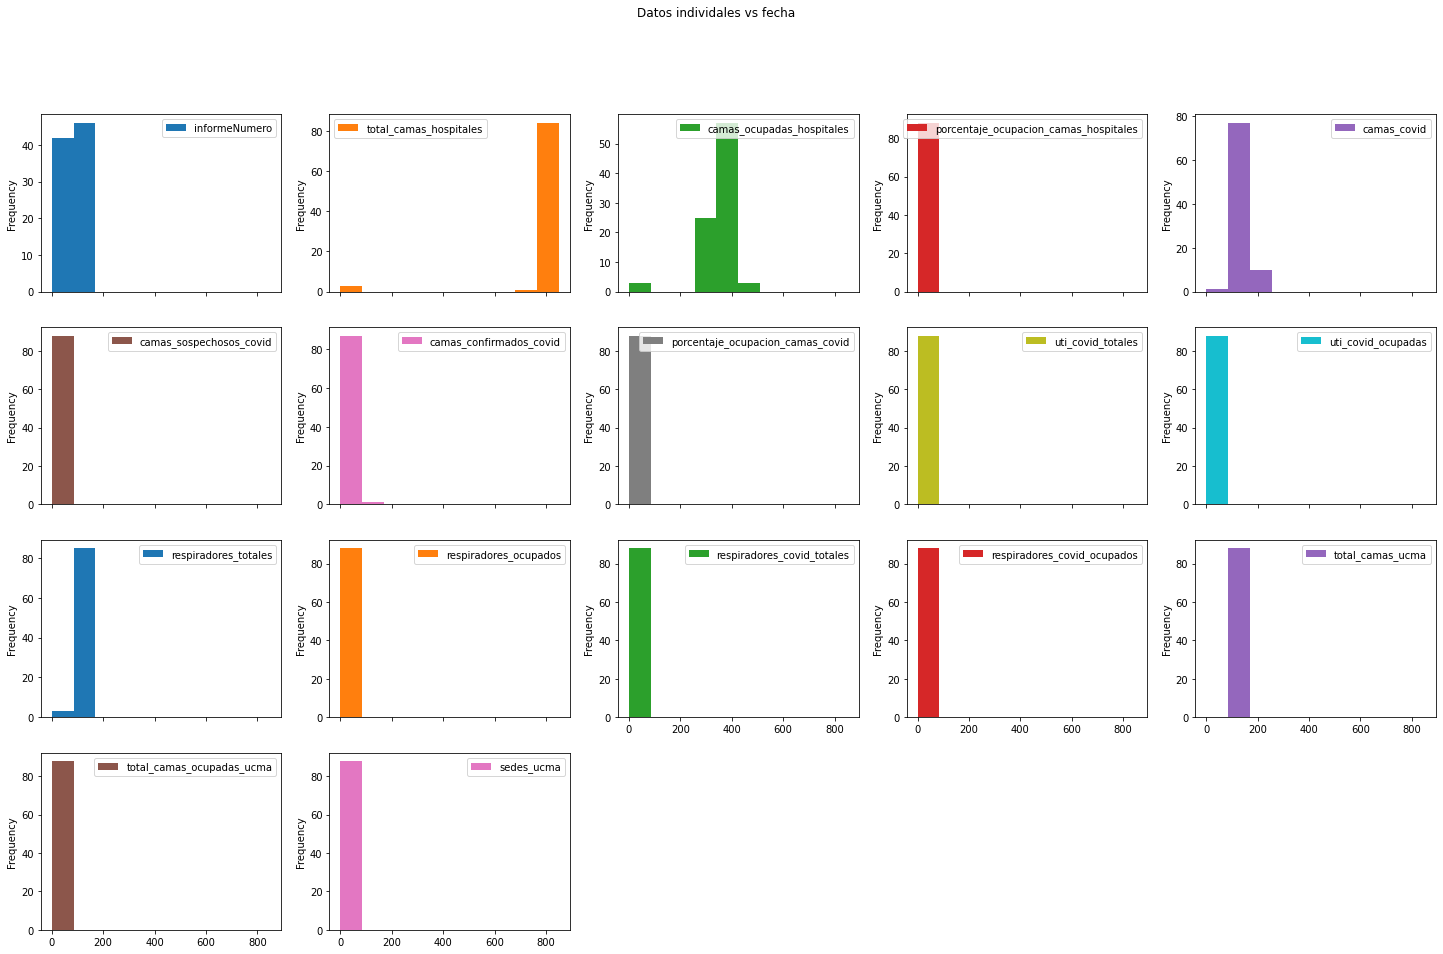

In [35]:
covid_beds.plot(kind = 'hist',
                 x = 'fecha',
                 subplots = True,
                 layout = (4, 5),
                 figsize=(25,15),
                 title='Datos individales vs fecha')
plt.show()

* Se puede ver como el valor de camas ocupadas de mayor frecuencia, nunca estuvo cerca del valor de camas totales de hospitales. Esto nos indica que nunse se llegó a saturar el sistema de salud

### 3.3. Grafica de valores

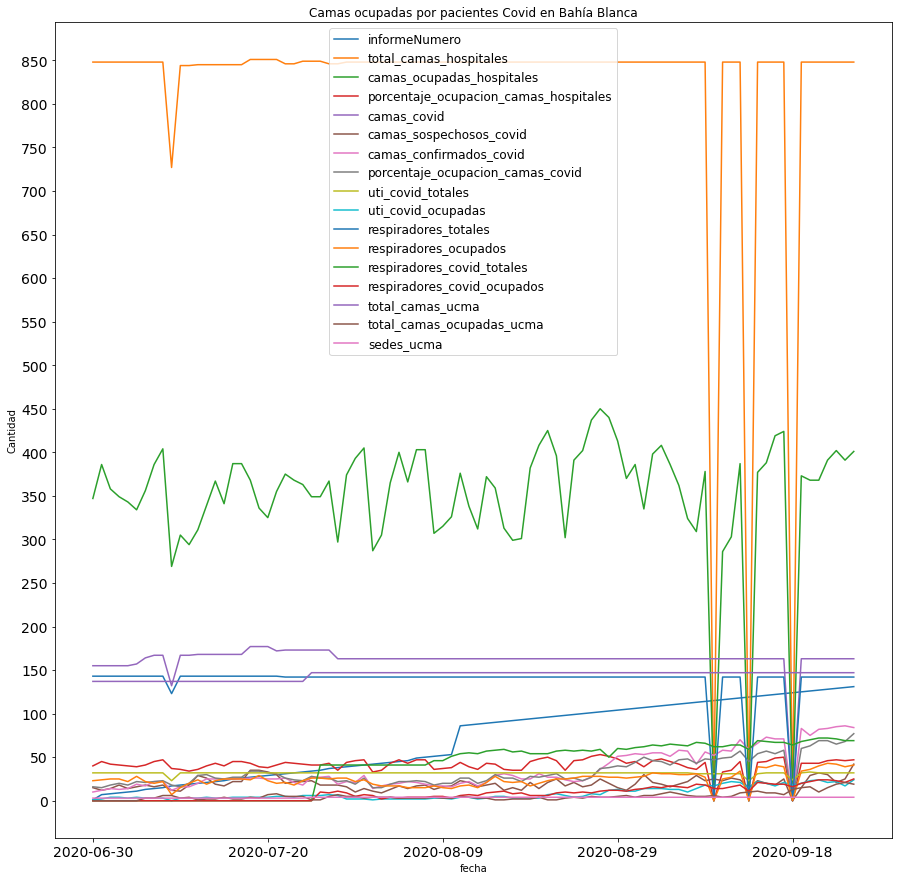

In [36]:
covid_beds.plot(figsize=(15,15), x='fecha', yticks=range(0,900,50), ylabel='Cantidad', title='Camas ocupadas por pacientes Covid en Bahía Blanca', fontsize=14).legend(loc=9, prop={'size': 12})
plt.show()

### 3.4. Muestra de valores individuales

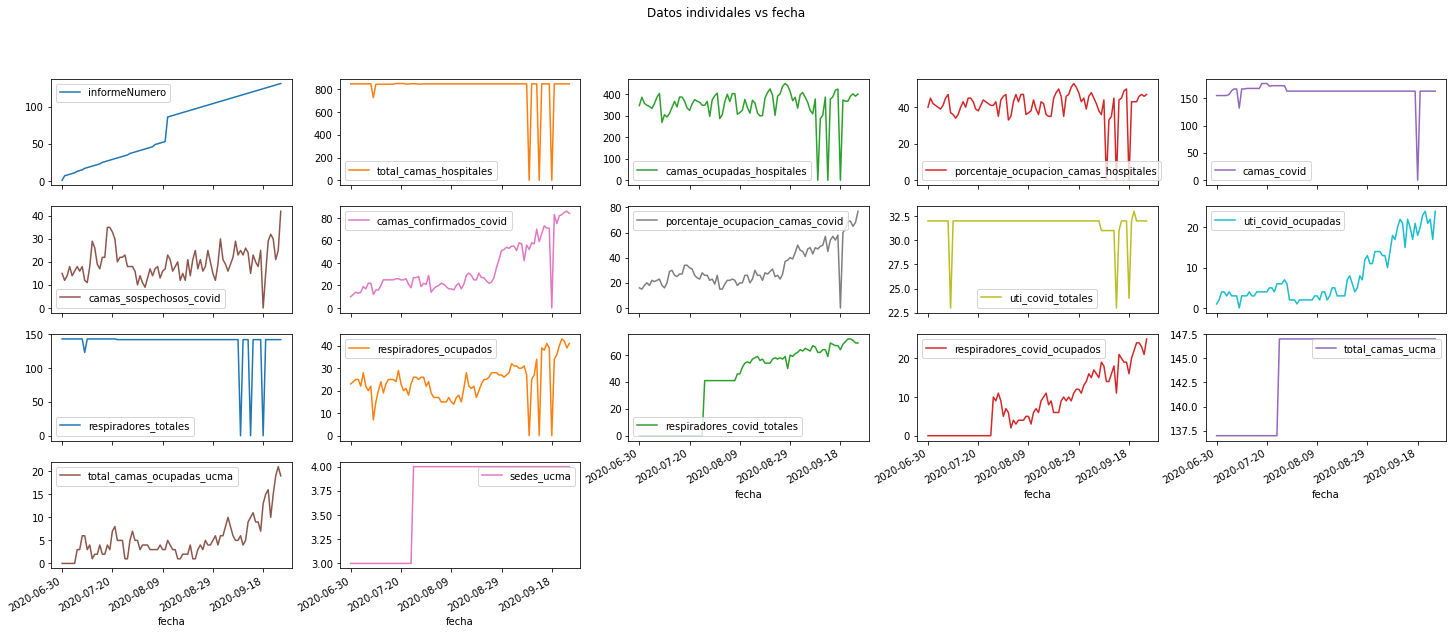

In [37]:
covid_beds.plot(kind = 'line',
                 x = 'fecha',
                 subplots = True,
                 layout = (4, 5),
                 figsize=(25,10),
                 title='Datos individales vs fecha')
plt.show()

* La primera característica que se nos hace evidente es que en Septiembre de 2020 hubo días en que muchos items del set de datos registraron un valor de 0, que puede deberse a un error o una falta en la carga de datos de dichos días.

* Lo segundo a destacar es que el número de respiradores totales sube de un día para otro desde los 0 respiradores a los 40. Esto podría deberse a que a partir de dicho día comenzó el registro de los respiradores disponibles. Algo similar ocurre con el total de camas ucma, es posible que dicho día se actualizaron los datos.

### 3.5. Total de Camas vs Ocupadas por covid

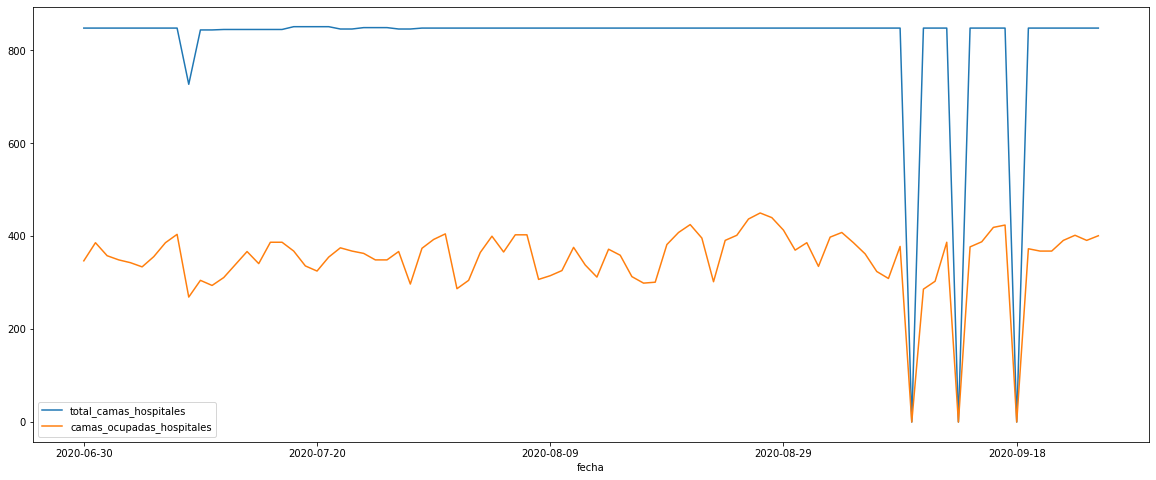

In [38]:
covid_beds.plot(kind = 'line',
                 x = 'fecha',
                 y = ['total_camas_hospitales','camas_ocupadas_hospitales'],
                 figsize=(20,8),
                 legend = True)
plt.show()

* Se puede apreciar como las camas ocupadas nunca superaron las camas totales, por lo que el sistema sanitario no se vió saturado.

### 3.6.Casos de Covid vs Camas ocupadas por covid

In [39]:
#Para relacionar ambos datasets, los fusionamos en unos solo. Para ello utilizamos la función merge, convirtiendo antes la fecha en formato fecha (estaban en formato string)
covid_cases['fecha'] = pd.to_datetime(covid_cases['fecha'])
covid_beds['fecha'] = pd.to_datetime(covid_beds['fecha'])

covid_situation = pd.merge(covid_cases, covid_beds,  how='inner', on=["fecha"])

In [40]:
display(covid_situation)

,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos,informeNumero,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma,observaciones
0,2020-06-30,106,29,71,6,574,23,342,2338,181,0,1,848,347,40,155,15,10,16,32,1,143,23,0,0,137,0,3,NaN
1,2020-07-01,114,31,77,6,581,22,342,2207,172,0,7,848,386,45,155,12,12,15,32,2,143,24,0,0,137,0,3,NaN
2,2020-07-02,124,40,78,6,588,24,356,2162,176,0,8,848,358,42,155,14,14,18,32,4,143,25,0,0,137,0,3,NaN
3,2020-07-03,137,53,78,6,606,31,356,2353,190,0,9,848,349,41,155,18,13,20,32,4,143,25,0,0,137,0,3,NaN
4,2020-07-04,154,70,78,6,622,31,356,2377,214,0,10,848,343,40,155,14,14,18,32,3,143,22,0,0,137,0,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,2020-09-21,2589,1319,1209,61,3557,303,417,1261,510,0,127,848,368,43,163,32,82,69,32,24,142,40,72,24,147,10,4,NaN
84,2020-09-22,2714,1371,1282,61,3615,292,417,1197,554,0,128,848,391,46,163,30,83,69,32,21,142,43,72,24,147,15,4,NaN
85,2020-09-23,2841,1464,1313,64,3658,286,417,1206,562,0,129,848,402,47,163,21,85,65,32,22,142,42,71,23,147,19,4,NaN
86,2020-09-24,2906,1474,1366,66,3682,331,417,1221,562,0,130,848,391,46,163,25,86,68,32,17,142,39,69,21,147,21,4,NaN


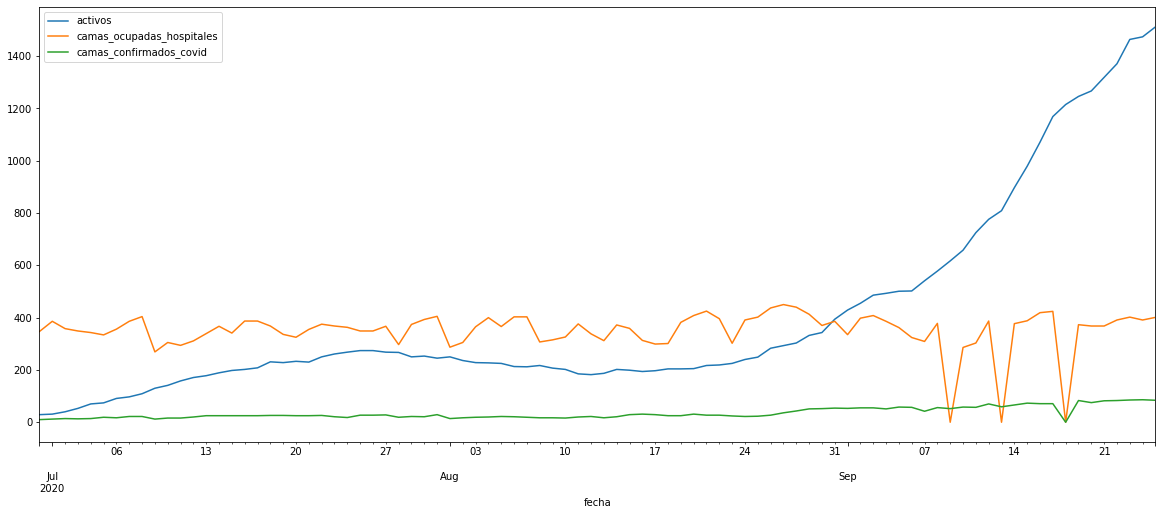

In [41]:
covid_situation.plot(kind = 'line',
                 x = 'fecha',
                 y = ['activos','camas_ocupadas_hospitales','camas_confirmados_covid'],
                 figsize=(20,8),
                 legend = True)
plt.show()

* Se observa como mientras los casos activos aumentan considerablemente, las camas ocupadas en hospitales y las camas de confirmados de covid se mantienen estable, lo que significa que, de los nuevos casos de covid, las mayoría no necesitó internación.